<a href="https://colab.research.google.com/github/mancai111/Rett_Mouse/blob/main/Statistics_CSVs_%2B_Histograms_%2B_Moment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Paths

In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/TestCase/heatmap/'

curr = '/content/drive/My Drive/TestCase/preprocessed_data/'

import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import dot
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import skew, kurtosis

os.chdir(abspath_curr)
print(os.getcwd())

/content/drive/My Drive/TestCase/heatmap


In [3]:
os.chdir(curr)
print(os.getcwd())

/content/drive/My Drive/TestCase/preprocessed_data


# Get and Save Statistics

Get the stats of LX, RX, LY, RY for each mouse at each speed on each day

In [ ]:
# Coordinate Day#

#     Up0 Up15 Up30 Up45 Up60 Down60 Down45 Down30 Down15 Down0 
# mean
# variance
# skewness
# kartosis

In [82]:
wild_list = ['NC436-M-WT', 'NC443-M-WT', 'NC506-M-WT', 'NC538-M-WT', 'NC541-M-WT', 'NC542-M-WT', 'NC544-M-WT', 'NC771-M-WT', 'NC772-M-WT', 'NC786-M-WT', 'NC804-M-WT']
rett_list = ['NC437-M-NL', 'NC440-M-NL', 'NC442-M-NL', 'NC539-M-NL', 'NC540-M-NL', 'NC545-M-NL', 'NC770-M-NL', 'NC773-M-NL', 'NC787-M-NL', 'NC790-M-NL', 'NC802-M-NL']

speed_list = ['fup0','fup15','fup30','fup45','fup60',
        'fdown60','fdown45','fdown30','fdown15','fdown0']

In [ ]:
def save_mouse_stats(mouse):

  # count how many days this mouse has
  len_days = len([name for name in os.listdir(curr+mouse+' alignedNeuronPaw/')])
  trial_days = ['Day'+str(i+1) for i in range(len_days)]

  # get the which paw coords we need
  paws = ['Lx', 'Ly', 'Rx', 'Ry']

  # save path
  result_path = '/content/drive/My Drive/TestCase/stats_data/'


  for t in trial_days:

    # find the workbook's sheet that contains the data
    basename = '{mouse}-Day{day}_aligned.xlsx'.format(mouse = mouse, day=t[3:])
    PN_WB = pd.ExcelFile(curr+mouse+' alignedNeuronPaw/'+basename)

    # define output dir
    output_path = os.path.join(result_path, mouse, t)

    isExist = os.path.exists(output_path)
    if not isExist:
      os.makedirs(output_path)

    # generate df for each paw coord, df col: pace+speed, df row: four moments of stat
    # each df is 4 moments of the paw coord at all pace+speeds for the mouse A on Day B
    for p in paws:

      df = pd.DataFrame(index=['Mean', 'Variance', 'Skewness', 'Kurtosis'])

      for i in speed_list:
        sample_paw = pd.read_excel(PN_WB, i+' pawMovement')[p]
        df[i[1:]] = [sample_paw.mean(), sample_paw.var(), skew(sample_paw), kurtosis(sample_paw)]
  
      df.to_csv(output_path+'/'+p+'.csv')

In [ ]:
for i in wild_list:
  save_mouse_stats(i)

In [ ]:
for i in rett_list:
  save_mouse_stats(i)

# Histogram

In [57]:
# Histogram method functions

def hist_sub(data, axes, row, day_count, color, paw):
  sns.histplot(data, kde=True, stat='probability', color=color, ax = axes[row])
  sns.set(style="darkgrid")
  if paw == 'Lx':
    axes[row].set_xlim(60,200)
  else:
    axes[row].set_xlim(90,150)
  axes[row].title.set_text('Day'+str(day_count))

def mouse_paw_speed_hist(mouse, paw, speed):

  color = ''
  if 'NL' in mouse:
    color = 'red'
  else:
    color = 'blue'

  day = [1,2,9,10]

  row = 0


  fig, axes = plt.subplots(4, 1, figsize=(12, 8))

  for i in day:

    basename = '{mouse}-Day{day}_aligned.xlsx'.format(mouse = mouse, day = str(i))
    PN_WB = pd.ExcelFile(curr+mouse+' alignedNeuronPaw/'+basename)

    sample_paw = pd.read_excel(PN_WB, speed+' pawMovement')[paw]


    
    hist_sub(sample_paw, axes, row, i, color, paw)

    row +=1



  plt.suptitle('Freq Distribution of {paw} at {speed} on each day for {mouse}'.format(paw = paw, speed = speed, mouse = mouse))
  fig.tight_layout()
  #plt.savefig(output_path+'/'+'{speed}.png'.format(speed=speed))
  plt.show()


In [60]:
# example: NC770, NC541, down60, Lx

rett_list = 'NC770-M-NL'
wild_list = 'NC541-M-WT'
speed = 'fdown60'

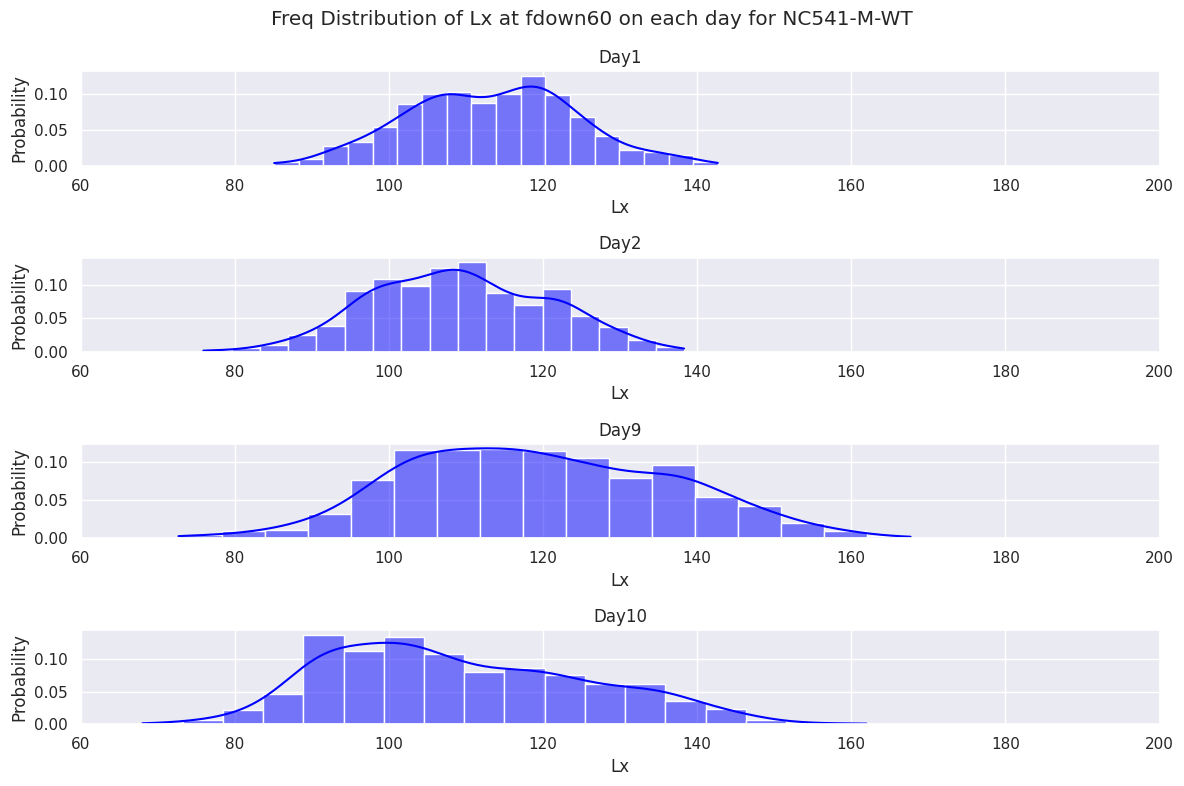

In [61]:
mouse_paw_speed_hist(wild_list, 'Lx', speed)

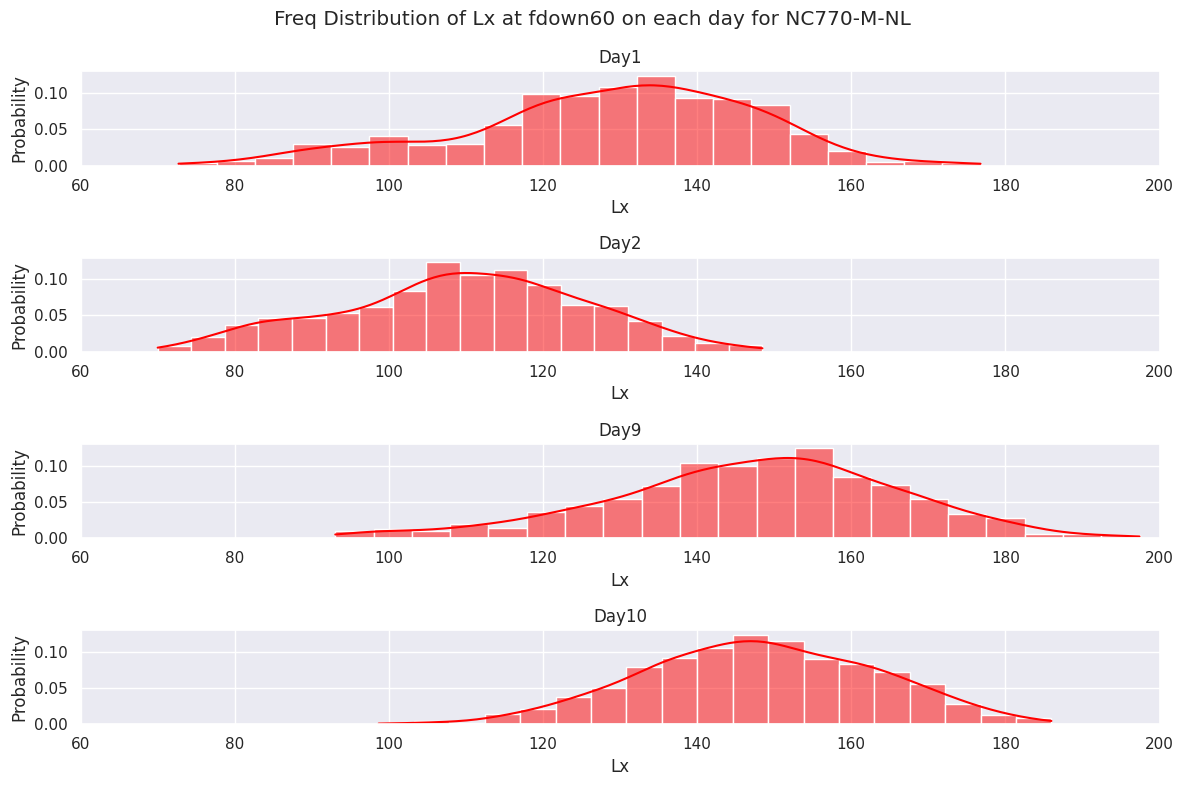

In [62]:
mouse_paw_speed_hist('NC770-M-NL', 'Lx', speed)

# Skewness and Kurtosis

In [63]:
# Skew and Kurtosis for NC541 and NC770 on Day1-2 and Day9-10

rett_skew = []
rett_kurtosis = []

wild_skew = []
wild_kurtosis = []

for i in [1,2,9,10]:
  nc770_lx = pd.read_csv('/content/drive/My Drive/TestCase/stats_data/NC770-M-NL/Day' + str(i)+ '/Lx.csv',index_col=0)
  rett_skew.append(nc770_lx.loc['Skewness', 'down60'])
  rett_kurtosis.append(nc770_lx.loc['Kurtosis', 'down60'])

  nc541_lx = pd.read_csv('/content/drive/My Drive/TestCase/stats_data/NC541-M-WT/Day' + str(i)+ '/Lx.csv',index_col=0)
  wild_skew.append(nc541_lx.loc['Skewness', 'down60'])
  wild_kurtosis.append(nc541_lx.loc['Kurtosis', 'down60'])

In [64]:
p = pd.DataFrame()
p['Kurtosis'] = wild_kurtosis + rett_kurtosis
p['Skewness'] = wild_skew + rett_skew
p['Type'] = ['NC541(Wild)', 'NC541(Wild)', 'NC541(Wild)', 'NC541(Wild)', 'NC770(Rett)', 'NC770(Rett)', 'NC770(Rett)', 'NC770(Rett)']
p['Day'] = ['Day1','Day2','Day9','Day10','Day1','Day2','Day9','Day10']
p

,Kurtosis,Skewness,Type,Day
0,-0.351789,0.030095,NC541(Wild),Day1
1,-0.475945,0.064778,NC541(Wild),Day2
2,-0.520918,0.141861,NC541(Wild),Day9
3,-0.579837,0.414607,NC541(Wild),Day10
4,-0.045752,-0.468946,NC770(Rett),Day1
5,-0.483161,-0.147326,NC770(Rett),Day2
6,0.092664,-0.339032,NC770(Rett),Day9
7,-0.316527,-0.084279,NC770(Rett),Day10


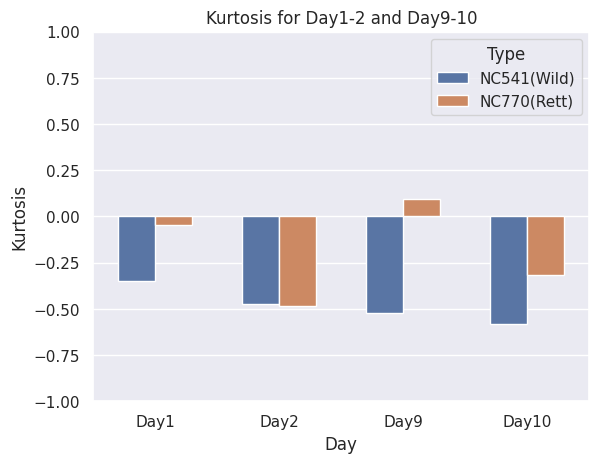

In [65]:
# generate use for poster 541 770

sns.barplot(data=p, x="Day", y="Kurtosis", hue="Type", width=0.6)
plt.ylim(-1,1)
plt.title('Kurtosis for Day1-2 and Day9-10')
plt.show()

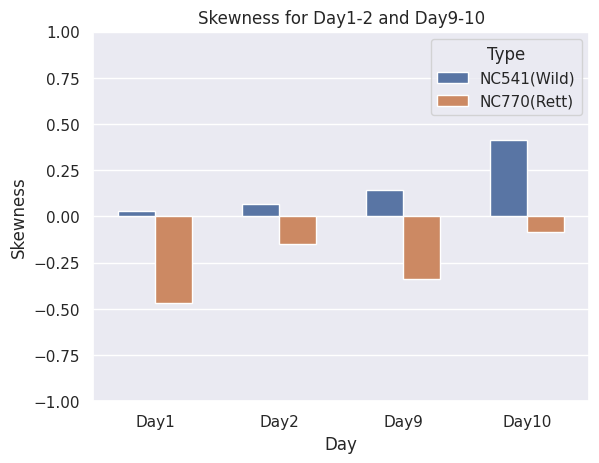

In [66]:
# generate use for poster 541 770

sns.barplot(data=p, x="Day", y="Skewness", hue="Type", width=0.6)
plt.ylim(-1,1)
plt.title('Skewness for Day1-2 and Day9-10')
plt.show()

# Percentage Diffs for Avg Vars of WT and NL

In [67]:
# get fdown60 lx,ly,rx,ry variance

def get_var(mouse, day, paw, stat, speed):

  path = '/content/drive/My Drive/TestCase/stats_data/'+ mouse + '/Day' + str(day) + '/'+ paw + '.csv'

  data_file = pd.read_csv(path, index_col=0)

  var = data_file.loc[stat, speed]
  
  return var


In [68]:
def get_percentage_diff(old,new):
  return 100 * ((new-old)/old)

In [ ]:
# % change in var, day1 vs day10, down60 as example

In [ ]:
# perc diff between Day10's avg var of all WT Lx and Day1's avg var of all WT Lx

In [75]:
wild_day1_var_lx = []
wild_day10_var_lx = []

for i in wild_list:
  wild_day1_var_lx.append(get_var(i,1,'Lx','Variance','down60'))
  wild_day10_var_lx.append(get_var(i,10,'Lx','Variance','down60'))

In [79]:
avg_wild_day1_var_lx = sum(wild_day1_var_lx)/11

In [80]:
avg_wild_day10_var_lx = sum(wild_day10_var_lx)/11

In [81]:
get_percentage_diff(avg_wild_day1_var_lx, avg_wild_day10_var_lx)

20.148714362885297

In [21]:
# perc diff between Day10's avg var of all NL Lx and Day10's avg var of all NL Lx

In [83]:
rett_day1_var_lx = []
rett_day10_var_lx = []

for i in rett_list:
  rett_day1_var_lx.append(get_var(i,1,'Lx','Variance','down60'))
  rett_day10_var_lx.append(get_var(i,10,'Lx','Variance','down60'))


In [84]:
avg_rett_day1_var_lx = sum(rett_day1_var_lx)/11
avg_rett_day10_var_lx = sum(rett_day10_var_lx)/11

get_percentage_diff(avg_rett_day1_var_lx, avg_rett_day10_var_lx)

-9.004655220647301